In [121]:
import meep as mp
import numpy as np

In [122]:
cell = mp.Vector3(1.0, 1.0, 0)

In [123]:
geometry = []

In [124]:
vol = mp.Volume(mp.Vector3(0.0,0.0,0.0), mp.Vector3(0.01,0.25,0.0))
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=10), component=mp.Ez, volume=vol, amplitude=100
    )
]

In [125]:
def sinsrc(t):
    return np.sin(2*np.pi*10*t)
cs = mp.CustomSource(sinsrc)
vol = mp.Volume(mp.Vector3(0.0,0.0,0.0), mp.Vector3(0.01,0.25,0.0))
sources = [
    mp.Source(
        cs, component=mp.Ez, volume=vol, amplitude=1
    )
]

In [126]:
pml_layers = [mp.PML(0.1)]

In [127]:
resolution = 100

In [128]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

-----------
Initializing structure...
time for choose_chunkdivision = 9.799e-05 s
Working in 2D dimensions.
Computational cell is 1 x 1 x 0 with resolution 100
time for set_epsilon = 0.00947499 s
-----------


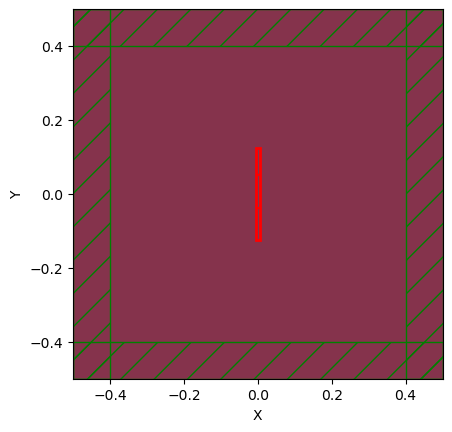

In [129]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [130]:
sim.run(mp.at_end(mp.output_efield_z),until=0.998)

FloatProgress(value=0.0, description='0% done ', max=0.998)

creating output file "./ez-000000200.h5"...
run 0 finished at t = 1.0 (200 timesteps)


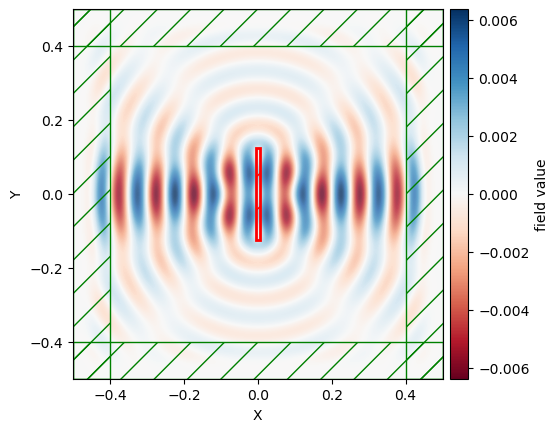

In [131]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Ez, field_parameters={"colorbar":True})
plt.show()

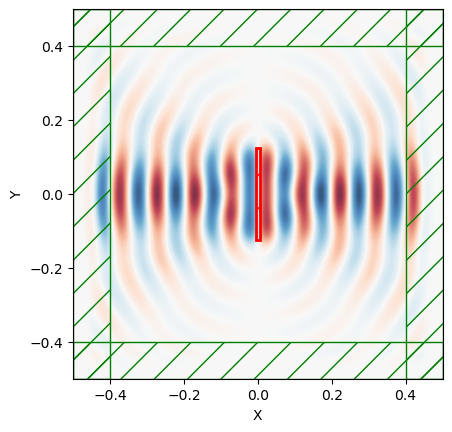

In [132]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Hy)
plt.show()

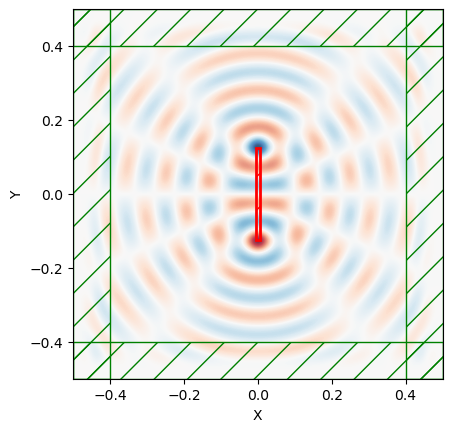

In [133]:
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D(fields=mp.Hx)
plt.show()

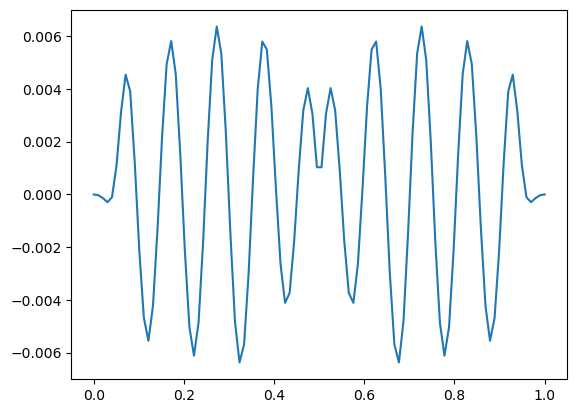

In [134]:
import h5py
import numpy as np
fn = "ez-000000200.h5"

def extract_single_kv_hdf(filename):
    with h5py.File(filename, "r") as f:
        a_group_key = list(f.keys())[0]
        ds_arr = f[a_group_key][()]
        return ds_arr

ds = extract_single_kv_hdf(fn)
plt.plot(np.linspace(0,1,100),ds[:,50])
